In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
d = pd.read_csv(r"Phishing_Legitimate_Importance.csv")

In [4]:
# Choose the columns for the feature set and the target variable
cols = ['NumDots', 'SubdomainLevel', 'UrlLength', 'NumDash', 'AtSymbol',
       'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'NumSensitiveWords',
       'PctExtHyperlinks', 'InsecureForms', 'AbnormalFormAction',
       'MissingTitle']

In [5]:

d.dropna(inplace=True)

#to check if theres any nulll values in the dataset
from pandas.core.api import isnull
d.isnull().sum()

id                    0
NumDots               0
SubdomainLevel        0
UrlLength             0
NumDash               0
AtSymbol              0
TildeSymbol           0
NumUnderscore         0
NumPercent            0
NumAmpersand          0
NumHash               0
NumNumericChars       0
NoHttps               0
RandomString          0
NumSensitiveWords     0
PctExtHyperlinks      0
InsecureForms         0
AbnormalFormAction    0
MissingTitle          0
CLASS_LABEL           0
dtype: int64

In [7]:
# Extract the feature set and target variable from the dataset
X = d[cols].values
Y = d['CLASS_LABEL'].values

In [8]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=40)

In [9]:
# Scale the feature set using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
n_scaler = MinMaxScaler()
X_train_scaled = n_scaler.fit_transform(x_train.astype(float))
X_test_scaled = n_scaler.transform(x_test.astype(float))

In [10]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")


Accuracy: 79.95 %


Accuracy score:  0.7995
[[714 325]
 [ 76 885]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1039
           1       0.73      0.92      0.82       961

    accuracy                           0.80      2000
   macro avg       0.82      0.80      0.80      2000
weighted avg       0.82      0.80      0.80      2000



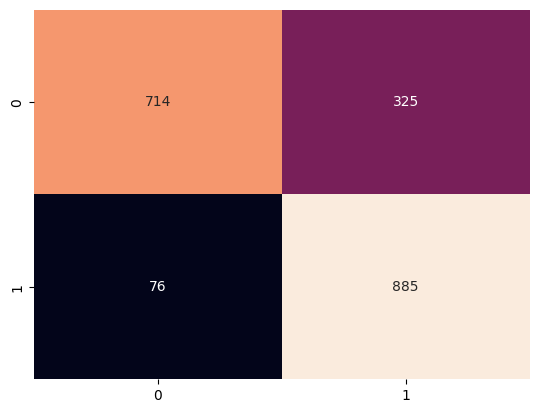

In [11]:
#print the test acccurcy and the confusion matrix of svm
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print(cm)

sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))

In [12]:
# Random Search for Hyperparameter Tuning for a SVM model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from numpy.random import randint, choice

# Define the hyperparameter space
param_dist = {'C': [1, 1000],
                'gamma': ['scale', 'auto'],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Define the random search object
svc_random = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    random_state=42
)

# Fit the random search object to the data
svc_random.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 1000],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [13]:
# Print the best hyperparameters and the test accuracy
print("Best Parameters:", svc_random.best_params_)
print("Test Accuracy:", svc_random.score(X_test_scaled, y_test))


Best Parameters: {'kernel': 'poly', 'gamma': 'scale', 'C': 1000}
Test Accuracy: 0.9175


In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', gamma= 'scale', C =1000 )
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9175


Accuracy score:  0.9175
[[939 100]
 [ 65 896]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1039
           1       0.90      0.93      0.92       961

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



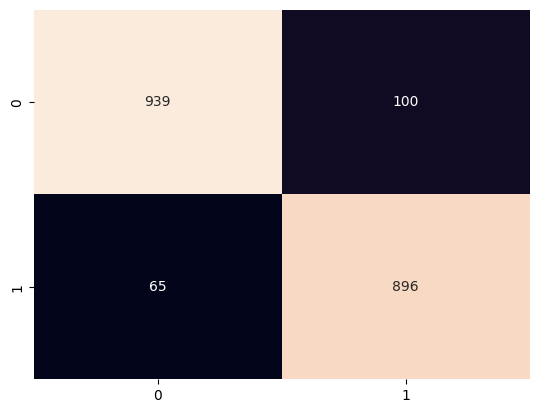

In [17]:
#print the test acccurcy and the confusion matrix of the best model
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy score: ", accuracy_score(y_test, y_pred))
cm= confusion_matrix(y_test,y_pred)
print(cm)

sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))


In [19]:
#apply GridSearchCV to find the best parameters for SVM
from sklearn.model_selection import GridSearchCV, KFold

# defining parameter range
param_grid = {'C': [1, 1000],
                'gamma': ['scale', 'auto'],
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
SVM_grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=KFold(n_splits=5))
  
# fitting the model for grid search
SVM_grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ...C=1, gamma=scale, kernel=linear;, score=0.781 total time=   5.7s
[CV 2/5] END ...C=1, gamma=scale, kernel=linear;, score=0.792 total time=   5.5s
[CV 3/5] END ...C=1, gamma=scale, kernel=linear;, score=0.799 total time=   5.6s
[CV 4/5] END ...C=1, gamma=scale, kernel=linear;, score=0.802 total time=   7.5s
[CV 5/5] END ...C=1, gamma=scale, kernel=linear;, score=0.814 total time=   8.2s
[CV 1/5] END .....C=1, gamma=scale, kernel=poly;, score=0.868 total time=   4.7s
[CV 2/5] END .....C=1, gamma=scale, kernel=poly;, score=0.859 total time=   3.9s
[CV 3/5] END .....C=1, gamma=scale, kernel=poly;, score=0.868 total time=   3.5s
[CV 4/5] END .....C=1, gamma=scale, kernel=poly;, score=0.873 total time=   3.4s
[CV 5/5] END .....C=1, gamma=scale, kernel=poly;, score=0.869 total time=   3.7s
[CV 1/5] END ......C=1, gamma=scale, kernel=rbf;, score=0.863 total time=   6.3s
[CV 2/5] END ......C=1, gamma=scale, kernel=rbf;

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [1, 1000], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [20]:
# Print the besthyperparameters and the test accuracy
print("Best Parameters:", SVM_grid.best_params_)
print("Test Accuracy:", SVM_grid.score(X_test_scaled, y_test))

Best Parameters: {'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.915


In [21]:
#train the model using the pest parameter
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', C= 1000, gamma='scale')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.915


Accuracy score:  0.915
[[939 100]
 [ 70 891]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1039
           1       0.90      0.93      0.91       961

    accuracy                           0.92      2000
   macro avg       0.91      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000



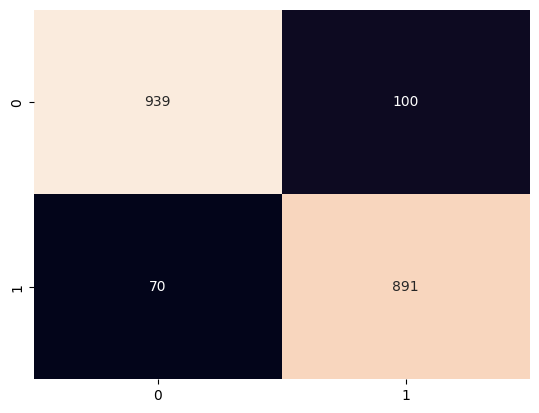

In [22]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print(cm)

sns.heatmap(cm, annot=True , cbar=False, fmt='g')
print(classification_report(y_test, y_pred))


In [23]:
import sklearn.metrics 
print('accuracy : ', sklearn.metrics.accuracy_score(y_test, y_pred)*100,"%")
print('precision : ', sklearn.metrics.precision_score(y_test, y_pred)*100,"%")
print('recall : ', sklearn.metrics.recall_score(y_test, y_pred)*100,"%")
print('F1 : ', sklearn.metrics.f1_score(y_test, y_pred)*100,"%")

accuracy :  91.5 %
precision :  89.90918264379415 %
recall :  92.7159209157128 %
F1 :  91.29098360655739 %
